In [1]:
import pandas as pd

In [2]:
fact_table = pd.read_csv("Fact Table.csv")

In [3]:
flight_date = pd.read_csv("Flight Date.csv")

In [4]:
df = pd.merge(fact_table, flight_date, left_on="Flight Date Surrogate Key", right_on="Flight Date ID")

In [5]:
df = df[["MONTH", "DISTANCE", "CRS_ELAPSED_TIME","is_cancelled"]]

In [6]:
df

,MONTH,DISTANCE,CRS_ELAPSED_TIME,is_cancelled
0,1,335.0,109.0,0
1,1,1222.0,177.0,0
2,1,192.0,65.0,0
3,11,349.0,85.0,0
4,11,130.0,56.0,1
...,...,...,...,...
13577019,9,1072.0,175.0,0
13577020,9,496.0,95.0,0
13577021,9,954.0,163.0,0
13577022,9,364.0,82.0,0


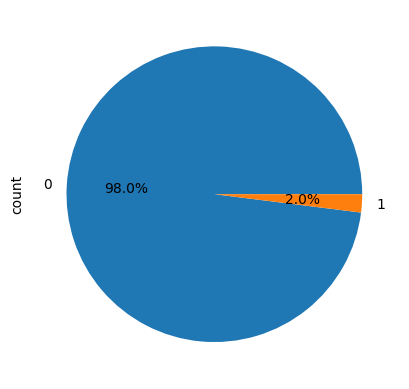

In [7]:
import matplotlib.pyplot as plt

counts = df['is_cancelled'].value_counts()

# Plotting the pie chart
counts.plot(kind='pie', autopct='%1.1f%%')

# Display the plot
plt.show()

In [8]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

X = df.drop(['is_cancelled'], axis=1)
y = df['is_cancelled']
X_res, y_res = rus.fit_resample(X, y)

In [9]:
df

,MONTH,DISTANCE,CRS_ELAPSED_TIME,is_cancelled
0,1,335.0,109.0,0
1,1,1222.0,177.0,0
2,1,192.0,65.0,0
3,11,349.0,85.0,0
4,11,130.0,56.0,1
...,...,...,...,...
13577019,9,1072.0,175.0,0
13577020,9,496.0,95.0,0
13577021,9,954.0,163.0,0
13577022,9,364.0,82.0,0


In [10]:
# import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming combined_data is your DataFrame containing the combined X_res and y_res
scaler = MinMaxScaler()
normalize_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)



In [11]:
normalize_df

,MONTH,DISTANCE,CRS_ELAPSED_TIME,is_cancelled
0,0.000000,0.061884,0.224514,0.0
1,0.000000,0.236697,0.264585,0.0
2,0.000000,0.033701,0.198586,0.0
3,0.909091,0.064643,0.210371,0.0
4,0.909091,0.021482,0.193282,1.0
...,...,...,...,...
13577019,0.727273,0.207134,0.263406,0.0
13577020,0.727273,0.093615,0.216264,0.0
13577021,0.727273,0.183879,0.256335,0.0
13577022,0.727273,0.067600,0.208603,0.0


In [12]:
from sklearn.model_selection import train_test_split

# Assuming you have your features X and target variable y
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=1/3, random_state=42, stratify=y_res)


In [13]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

# Instantiate Gradient Boosting Regressor
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
# Fit to training set
gbc.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=300,
                           random_state=100)

In [14]:
from sklearn.metrics import precision_score, recall_score
# Predict on test set
pred_y = gbc.predict(X_test)
 
# accuracy
acc = accuracy_score(y_test, pred_y)
precision = precision_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
f_score = (2*precision*recall)/(precision+recall)
print("Gradient Boosting Classifier accuracy is: "+str(round(acc*100,2)))
print("Gradient Boosting Classifier precision is: "+str(round(precision*100,2)))
print("Gradient Boosting Classifier recall is: "+str(round(recall*100,2)))
print("Gradient Boosting Classifier F score is: "+str(round(f_score*100,2)))


Gradient Boosting Classifier accuracy is: 62.57
Gradient Boosting Classifier precision is: 61.89
Gradient Boosting Classifier recall is: 65.45
Gradient Boosting Classifier F score is: 63.62


In [15]:
import pandas as pd 
import numpy as np
from sklearn import tree
#train classifier
clf = tree.DecisionTreeClassifier() # defining decision tree classifier
clf=clf.fit(X_train,y_train) # train data on new data and new target

In [16]:
pred_y = clf.predict(X_test) #  assign removed data as input
acc = accuracy_score(y_test, pred_y)
precision = precision_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
f_score = (2*precision*recall)/(precision+recall)
print("Decision Tree Classifier accuracy is: "+str(round(acc*100,2)))
print("Decision Tree Classifier precision is: "+str(round(precision*100,2)))
print("Decision Tree Classifier recall is: "+str(round(recall*100,2)))
print("Decision Tree Classifier recall is: "+str(round(f_score*100,2)))



Decision Tree Classifier accuracy is: 63.59
Decision Tree Classifier precision is: 64.22
Decision Tree Classifier recall is: 61.39
Decision Tree Classifier recall is: 62.77


In [17]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
pred_y = rf.predict(X_test)
acc = accuracy_score(y_test, pred_y)
precision = precision_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
f_score = (2*precision*recall)/(precision+recall)
print("Random Forrest Classifier accuracy is: "+str(round(acc*100,2)))
print("Random Forrest Classifier precision is: "+str(round(precision*100,2)))
print("Random Forrest Classifier recall is: "+str(round(recall*100,2)))
print("Random Forrest Classifier f score is: "+str(round(f_score*100,2)))


Random Forrest Classifier accuracy is: 64.22
Random Forrest Classifier precision is: 63.61
Random Forrest Classifier recall is: 66.5
Random Forrest Classifier f score is: 65.02
